In [1]:
%pylab inline
import snrlightcurve as snr
import matplotlib.patches as mpatch
import g19 
reload(g19)
reload(snr)
params = {'axes.linewidth':1.5,'lines.linewidth':1.3,'xtick.labelsize':20,'ytick.labelsize':20,\
          'xtick.major.size':7,'xtick.major.width':2,'ytick.major.size':7,'ytick.major.width':2,\
          'xtick.minor.size':4,'xtick.minor.width':1.5,'ytick.minor.size':4,'ytick.minor.width':1.5}
plt.rcParams.update(params)
plt.rcParams.update({'figure.autolayout': True})

import time as tm
import datetime as dt

##EXTENSION FILE PATHS
#fileext_CommitteeMeet = '/Users/sumits2k/Desktop/Research/SNResearch2/RadioSNRs/SN1885/Writeups/Sarbadhicary2016_SN1885/'
#fileext_SantaCruz = '/Users/sumits2k/Desktop/TALKS/'
fileext_diagnostics = '/Users/sumits2k/Desktop/Research/SNResearch2/RadioSNRs/SN1885/Diagnostics/'

Populating the interactive namespace from numpy and matplotlib


## Testing Light Curves

Here I assume $\dfrac{E}{10^{51} ergs} = \dfrac{M}{1.4\ M_{\odot}}$. __This is a test relation__. Once you set up the density-ejecta mass parameter space, we will change this relation based on known observations. 

We also assume $\epsilon_e = 10^{-4}$ and $p = 2.2$, consistent with observations for young SNRs.

NameError: name 'mej' is not defined

6.7824e+20


/Users/sumits2k/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


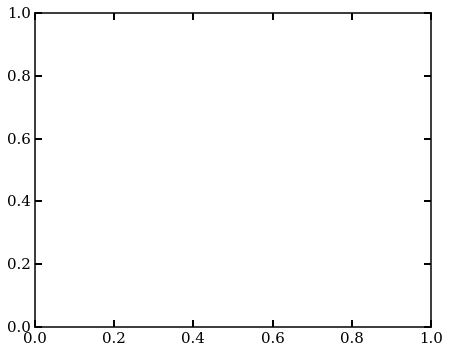

In [2]:

if True:  #Ejecta Mass
    vals = [0.7, 1.0, 1.4]
    label = r' $\rm{M_{\odot}}$'

if False:  #Density
    vals = [0.1, 0.3, 2.0]
    label = r' $\rm{cm^{-3}}$'

tim_m05, rad_m05, lum_m05, vel = snr.lightcurve_Full(n0=0.3, mej=vals[0], epse=0.0001, pp=2.2, sntype='ia')
tim_m10, rad_m10, lum_m10, vel = snr.lightcurve_Full(n0=0.3, mej=vals[1], epse=0.0001, pp=2.2, sntype='ia')
tim_m14, rad_m14, lum_m14, vel = snr.lightcurve_Full(n0=0.3, mej=vals[2], epse=0.0001, pp=2.2, sntype='ia')

fluxsn1885 = 0.009 #mJy, Chomiuk's upper limit from VLA (see email)
dist = 0.785
e_dist = 0.04
lumsn1885 = 1.0e24*1.2*fluxsn1885*0.77*0.77
yerr = 1.0e24*np.sqrt((2.4*fluxsn1885*dist*e_dist)**2.0)
print yerr
plt.rc('font', family='serif')
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(tim_m05[np.nonzero(lum_m05)], lum_m05[np.nonzero(lum_m05)], 'k-.', label=r'{}'.format(mej[0])+label)
plt.plot(tim_m10[np.nonzero(lum_m10)], lum_m10[np.nonzero(lum_m10)], 'k--', label=r'{}'.format(mej[1])+label)
plt.plot(tim_m14[np.nonzero(lum_m14)], lum_m14[np.nonzero(lum_m14)], 'k-', label=r'{}'.format(mej[2])+label)
plt.errorbar([131],[lumsn1885], yerr=yerr, color='r', uplims=True, capsize=5)
plt.text(131,6.0e21, 'SN 1885a', fontsize=12, color='r')
plt.text(600,3.0e23, r'$1.0\ \rm{M_{\odot}}$', fontsize=18)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Age [years]', fontsize=18)
plt.ylabel('8.4 GHz Luminosity [ergs/s/Hz]', fontsize=18)
plt.xlim(7.0,2000)
plt.ylim(1.0e20,1.0e24)
plt.legend(loc=2, frameon=False, fontsize=13)

plt.subplot(1,2,2)
plt.plot(tim_m05[np.nonzero(lum_m05)], rad_m05[np.nonzero(lum_m05)], 'k-.', label=r'{}'.format(mej[0])+label)
plt.plot(tim_m10[np.nonzero(lum_m10)], rad_m10[np.nonzero(lum_m10)], 'k--', label=r'{}'.format(mej[1])+label)
plt.plot(tim_m14[np.nonzero(lum_m14)], rad_m14[np.nonzero(lum_m14)], 'k-', label=r'{}'.format(mej[2])+label)
plt.plot([131],[1.5], 'ro')
plt.errorbar([131], [1.5], yerr=0.15, fmt='o', color='r')
plt.text(131,0.7, 'SN 1885a\n(Ca II absorption)', fontsize=12, color='r')
plt.text(600,20, r'$1.0\ \rm{M_{\odot}}$', fontsize=18)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Age [years]', fontsize=18)
plt.ylabel('Radius [pc]', fontsize=18)
plt.legend(loc=2,frameon=False, fontsize=13)
plt.xlim(7.0,2000)
plt.ylim(1.0e-1,5.0e1)
plt.show()

### Parameter Space 

Checking visually if the statistic: $\rm{| log L_{85} - log L |}$ works

Statistic:  -0.328754945275


/Users/sumits2k/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


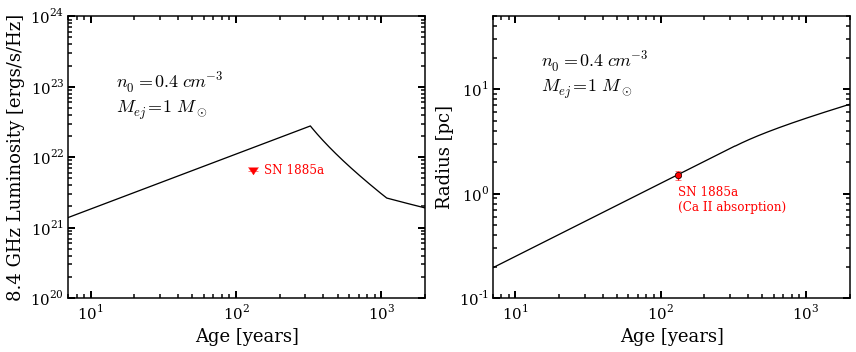

In [3]:
tim, rad, lum, vel = snr.lightcurve_Full(n0=0.4, mej=1.0, epse=0.0001, pp=2.2, sntype='ia')
rad_131, lum_131, vel_131 = snr.lightcurve(n0=0.4, mej=1.0, epse=0.0001, pp=2.2, tsnap=131, sntype='ia')
print 'Statistic: ', np.log10(lumsn1885) - np.log10(lum_131)

plt.rc('font', family='serif')
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(tim[np.nonzero(lum)], lum[np.nonzero(lum)], 'k-')
plt.text(15, 4.0e22, r'$n_0 = 0.4\ cm^{-3}$'+'\n'+r'$M_{ej} = 1\ M_{\odot}$', fontsize=18)
#plt.plot([131.], [lum_131], 'ro')
plt.errorbar([131],[lumsn1885], yerr=yerr, color='r', uplims=True, capsize=5)
plt.text(155,6.0e21, 'SN 1885a', fontsize=12, color='r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Age [years]', fontsize=18)
plt.ylabel('8.4 GHz Luminosity [ergs/s/Hz]', fontsize=18)
plt.xlim(7.0,2000)
plt.ylim(1.0e20,1.0e24)
plt.legend(loc=2, frameon=False, fontsize=13)

plt.subplot(1,2,2)
plt.plot(tim[np.nonzero(rad)], rad[np.nonzero(rad)], 'k-')
plt.plot([131],[1.5], 'ro')
plt.errorbar([131], [1.5], yerr=0.15, fmt='o', color='r')
plt.text(131,0.7, 'SN 1885a\n(Ca II absorption)', fontsize=12, color='r')
plt.text(15, 9, r'$n_0 = 0.4\ cm^{-3}$'+'\n'+r'$M_{ej} = 1\ M_{\odot}$', fontsize=18)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Age [years]', fontsize=18)
plt.ylabel('Radius [pc]', fontsize=18)
plt.xlim(7.0,2000)
plt.ylim(1.0e-1,5.0e1)
plt.legend(loc=2, frameon=False, fontsize=13)
plt.tight_layout()
#plt.savefig('density_mej_example.pdf')
plt.show()

In [5]:
start = tm.time()
n0array = np.logspace(-2, 1,800)
mejarray = np.linspace(0.7,1.5,800)
stat_lum = np.zeros((n0array.size, mejarray.size))
stat_rad = np.zeros((n0array.size, mejarray.size))

for i, n0 in enumerate(n0array):
    for j, mej in enumerate(mejarray):
        rad, lum, vel = snr.lightcurve(n0=n0, mej=mej, epse=0.0001, pp=2.2, tsnap=131, sntype='ia')
        stat_lum[i,j] = 0. if lum<=lumsn1885 else 1.
        stat_rad[i,j] = 0. if rad>=1.35 else 1.

print 'RUNTIME = ',str(dt.timedelta(seconds=tm.time()-start))

RUNTIME =  0:00:13.411743


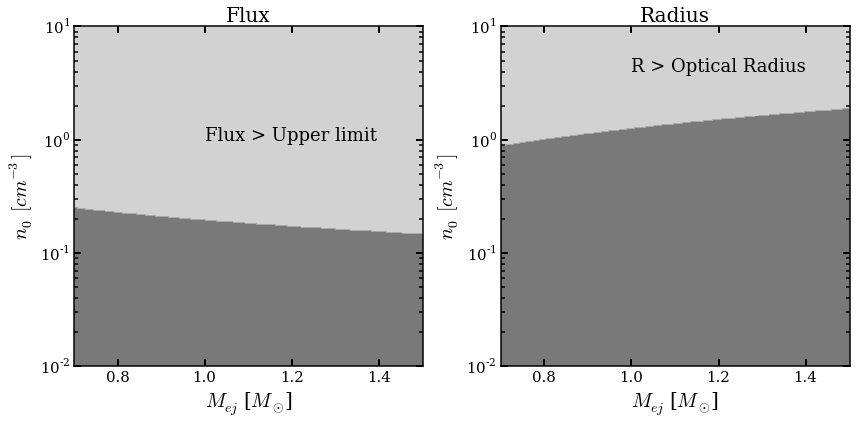

In [6]:
M, n = np.meshgrid(mejarray, n0array)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Flux',fontsize=20)
plt.contourf(M,n,stat_lum,1, cmap='gray', alpha=0.7)
plt.text(1.0,1.0, 'Flux > Upper limit', fontsize=18)
#plt.contourf(M,n,stat_rad,1, cmap='Oranges_r', alpha=0.3)
#plt.colorbar()
plt.yscale('log')
plt.xlabel(r'$M_{ej}$ [$M_{\odot}$]', fontsize=20)
plt.ylabel(r'$n_0$ $[cm^{-3}]$', fontsize=20)
plt.xticks([0.8,1.0,1.2,1.4])

plt.subplot(1,2,2)
plt.title('Radius',fontsize=20)
plt.contourf(M,n,stat_rad,1, cmap='gray', alpha=0.7)
plt.text(1.0,4.0, 'R > Optical Radius', fontsize=18)
#plt.colorbar()
plt.yscale('log')
plt.xlabel(r'$M_{ej}$ [$M_{\odot}$]', fontsize=20)
plt.ylabel(r'$n_0$ $[cm^{-3}]$', fontsize=20)
plt.xticks([0.8,1.0,1.2,1.4])
plt.tight_layout()
#plt.savefig('density_mej_paramspace.pdf')
plt.show()


## Parameter Space without relation between ejecta Mass and energy

#### Calculating Parameter Space

RUNTIME =  0:01:00.602335


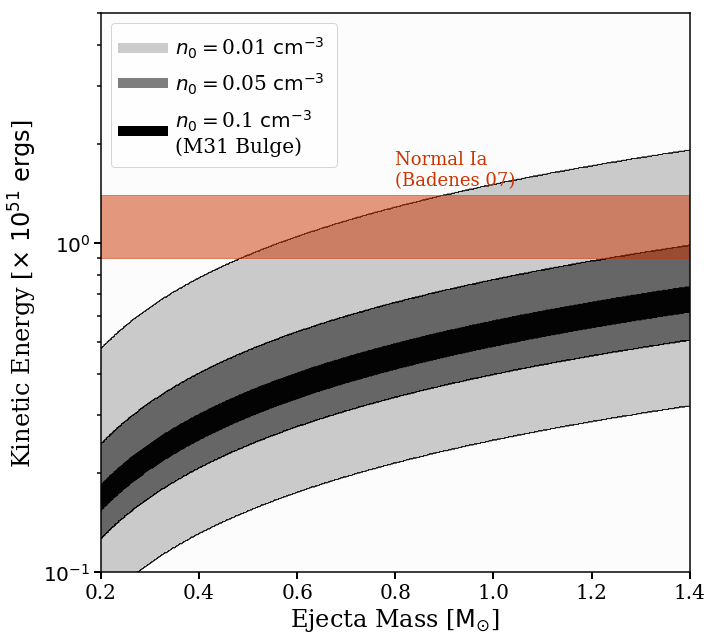

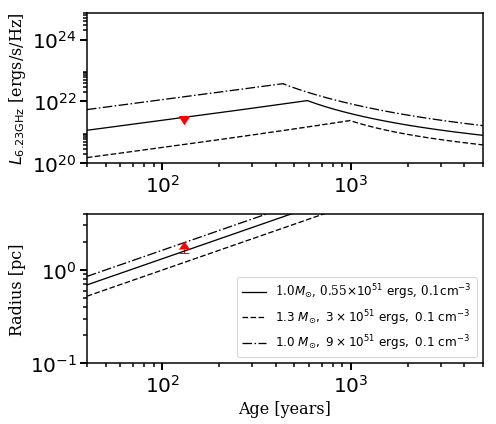

In [32]:
import snrlightcurve_freqparam as snr_ind
reload(snr_ind)


density = [0.01, 0.05, 0.1]
epse = 0.0001
pp = 2.2

fluxsn1885 = 0.00158*3.0 #mJy, Chomiuk's upper limit from document
dist = 0.785 #McConnachie 2005 - http://adsabs.harvard.edu/abs/2005MNRAS.356..979M
e_dist = 0.025
lumsn1885 = 1.0e24*1.2*fluxsn1885*dist*dist
yerr = 1.0e24*np.sqrt((2.4*fluxsn1885*dist*e_dist)**2.0)
rad1885 = 1.52 #Fesen07
raderr = 0.15
freq = 6.23e9 #Hz, observation from Laura

start = tm.time()
e51array = np.logspace(-1, 1, 800)
mejarray = np.linspace(0.1,2.0,800)
M, e = np.meshgrid(mejarray, e51array)
stat_lum_01 = np.zeros((e51array.size, mejarray.size))
stat_rad_01 = np.zeros((e51array.size, mejarray.size))
stat_lum_1 = np.zeros((e51array.size, mejarray.size))
stat_rad_1 = np.zeros((e51array.size, mejarray.size))
stat_lum_3 = np.zeros((e51array.size, mejarray.size))
stat_rad_3 = np.zeros((e51array.size, mejarray.size))

for i, e51 in enumerate(e51array):
    for j, mej in enumerate(mejarray):
        rad, lum, vel = snr_ind.lightcurve(n0=density[0], mej=mej, e51=e51, epse=epse, pp=pp, freq=freq, tsnap=131, sntype='ia')
        stat_lum_01[i,j] = 0. if lum<=lumsn1885 else 1.
        stat_rad_01[i,j] = 0. if rad>=(rad1885) else 1.
        rad, lum, vel = snr_ind.lightcurve(n0=density[1], mej=mej, e51=e51, epse=epse, pp=pp, freq=freq, tsnap=131, sntype='ia')
        stat_lum_1[i,j] = 0. if lum<=lumsn1885 else 1.
        stat_rad_1[i,j] = 0. if rad>=(rad1885) else 1.
        rad, lum, vel = snr_ind.lightcurve(n0=density[2], mej=mej, e51=e51, epse=epse, pp=pp, freq=freq, tsnap=131, sntype='ia')
        stat_lum_3[i,j] = 0. if lum<=lumsn1885 else 1.
        stat_rad_3[i,j] = 0. if rad>=(rad1885) else 1.

print 'RUNTIME = ',str(dt.timedelta(seconds=tm.time()-start))
stat_01 = (stat_lum_01==stat_rad_01)
stat_1 = (stat_lum_1==stat_rad_1)
stat_3 = (stat_lum_3==stat_rad_3)

M, e = np.meshgrid(mejarray, e51array)
#~~~~~~INPUT~~~~~~~~#
mej = 1.0
e51 = 0.55
n0=0.1
showInputOnContourPlot = False
#~~~~~~~~~~~~~~~~~~~#

#~~~~~~MODEL LIGHT CURVES~~~~~~~~#
tim, rad, lum, vel = snr_ind.lightcurve_Full(n0=n0, mej=mej, e51=e51, freq=freq, epse=epse, pp=pp, sntype='ia')
timlow, radlow, lumlow, vel = snr_ind.lightcurve_Full(n0=n0, mej=1.3, e51=0.3, freq=freq, epse=epse, pp=pp, sntype='ia')
timhi, radhi, lumhi, vel = snr_ind.lightcurve_Full(n0=n0, mej=1.0, e51=1.0, freq=freq, epse=epse, pp=pp, sntype='ia')
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#


plt.figure(figsize=(10,9))
plt.rc('font', family='serif')
cs = plt.contourf(M,e,stat_3,40, cmap='gray_r',label='0.1')
plt.contourf(M,e,stat_1,40,cmap='gray_r',alpha=0.5)
plt.contourf(M,e,stat_01,40,cmap='gray_r',alpha=0.2)
#plt.annotate(s='', xy=(1.4,1.4), xytext=(1.4,0.9), arrowprops={'arrowstyle':'<|-|>', \
 #                                                      'lw':2, 'color':'red'})
if 1:
    plt.text(0.8, 1.5, 'Normal Ia\n(Badenes 07)', color='#CC3300', fontsize=18) 
    plt.axhspan(0.9, 1.4, color='#CC3300', alpha=0.5)
#plt.vlines(x=1.4, ymin=0.9, ymax=1.4, color='r', lw=3.0)

plt.plot([],[], 'k', lw=10.0, alpha=0.2, label=r'$n_0 = $'+'{} '.format(str(density[0]))+r'$\rm{cm^{-3}}$')
plt.plot([],[], 'k', lw=10.0, alpha=0.5, label=r'$n_0 = $'+'{} '.format(str(density[1]))+r'$\rm{cm^{-3}}$')
plt.plot([],[], 'k', lw=10.0, alpha=1.0, label=r'$n_0 = $'+'{} '.format(str(density[2]))+r'$\rm{cm^{-3}}$'+'\n(M31 Bulge)')
#plt.plot([1.4], [1.0], 'rx', mew=2.0, ms=10.0)
if showInputOnContourPlot:
    plt.axvline(x=mej, ls='-', color='r', lw=1.0)
    plt.axhline(y=e51, ls='-', color='r', lw=1.0)
    plt.plot([mej], [e51], 'ro')
plt.yscale('log')
plt.ylim(0.1,5.0)
plt.xlim(0.2, 1.4)
plt.xlabel(r'Ejecta Mass [$\rm{M_{\odot}}$]', fontsize=24)
plt.ylabel(r'Kinetic Energy [$\rm{\times\ 10^{51}\ ergs}$]', fontsize=24)
plt.legend(numpoints=1, loc=2, fontsize=20, borderpad = 0.6, handletextpad=0.6, labelspacing=0.5)
plt.savefig(fileext_diagnostics+\
            'n0E51Mej_ParSpace_n0_{0}_epse_{1}_pp_{2}.png'.format(str(density[-1]), str(epse), str(pp)))


plt.rc('font', family='serif')
fig, (ax0, ax1) = plt.subplots(figsize=(7,6), nrows=2)
ax0.plot(tim[np.nonzero(lum)], lum[np.nonzero(lum)], 'k-', label=r'$1.4\ M_{\odot},\ 7\times10^{50}\ \rm{ergs},\ 0.1\ cm^{-3}$')
ax0.plot(timlow[np.nonzero(lumlow)], lumlow[np.nonzero(lumlow)], 'k--', \
         label=r'$1.3\ M_{\odot},\ 3\times10^{50}\ \rm{ergs},\ 0.1\ cm^{-3}$')
ax0.plot(timhi[np.nonzero(lumhi)], lumhi[np.nonzero(lumhi)], 'k-.', \
         label=r'$1.0\ M_{\odot},\ 9\times10^{50}\ \rm{ergs},\ 0.1\ cm^{-3}$')
ax0.errorbar([131],[lumsn1885], yerr=yerr, color='r', uplims=True, capsize=5)
#plt.text(155,6.0e21, 'SN 1885a', fontsize=12, color='r')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_ylabel('$L_{6.23 \mathrm{GHz}}$ [ergs/s/Hz]', fontsize=16)
ax0.set_xlim(40.,5000)
ax0.set_ylim(1.0e20,7.0e24)

ax1.plot(tim[np.nonzero(rad)], rad[np.nonzero(rad)], 'k-', \
         label=str(mej)+r'$M_{\odot}$, '+str(e51)+r'$\times 10^{51}\ \rm{ergs}$, '+str(n0)+r'$\rm{cm^{-3}}$')
ax1.plot(timlow[np.nonzero(radlow)], radlow[np.nonzero(radlow)], 'k--', \
         label=r'$1.3\ M_{\odot},\ 3\times10^{51}\ \rm{ergs},\ 0.1\ cm^{-3}$')
ax1.plot(timhi[np.nonzero(radhi)], radhi[np.nonzero(radhi)], 'k-.', \
         label=r'$1.0\ M_{\odot},\ 9\times10^{51}\ \rm{ergs},\ 0.1\ cm^{-3}$')
ax1.errorbar([131], [1.5], yerr=0.15, color='r', lolims=True, capsize=5)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Age [years]', fontsize=16)
ax1.set_ylabel('Radius [pc]', fontsize=16)
ax1.set_xlim(40.,5000.)
ax1.set_ylim(1.0e-1,4.)
ax1.legend(loc=4, fontsize=12)

plt.subplots_adjust(hspace=0.3)
#plt.savefig(fileext_SantaCruz+'LightCurves_SN1885a.pdf', dpi=150)

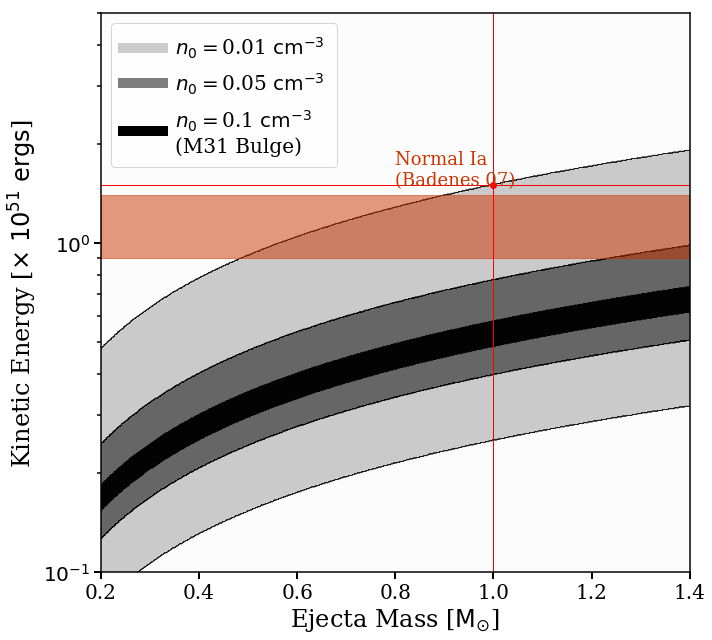

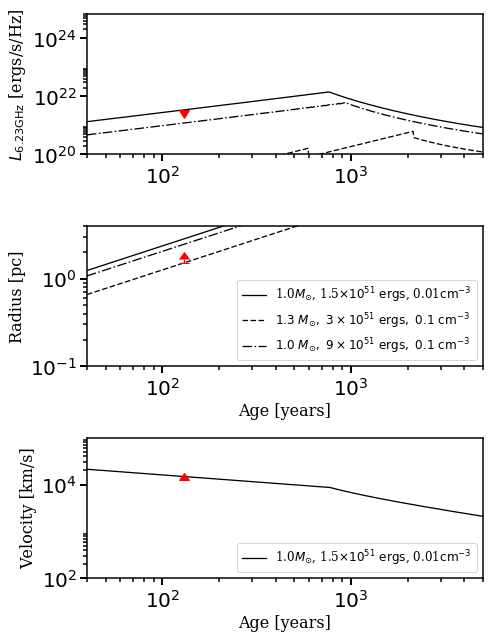

In [46]:
#~~~~~~INPUT~~~~~~~~#
mej = 1.0
e51 = 1.5
n0=0.01
showInputOnContourPlot = True
#~~~~~~~~~~~~~~~~~~~#

#~~~~~~MODEL LIGHT CURVES~~~~~~~~#
tim, rad, lum, vel = snr_ind.lightcurve_Full(n0=n0, mej=mej, e51=e51, freq=freq, epse=epse, pp=pp, sntype='ia')
timlow, radlow, lumlow, vellow = snr_ind.lightcurve_Full(n0=n0, mej=1.3, e51=0.3, freq=freq, epse=epse, pp=pp, sntype='ia')
timhi, radhi, lumhi, velhi = snr_ind.lightcurve_Full(n0=n0, mej=1.0, e51=1.0, freq=freq, epse=epse, pp=pp, sntype='ia')
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#


plt.figure(figsize=(10,9))
plt.rc('font', family='serif')
cs = plt.contourf(M,e,stat_3,40, cmap='gray_r',label='0.1')
plt.contourf(M,e,stat_1,40,cmap='gray_r',alpha=0.5)
plt.contourf(M,e,stat_01,40,cmap='gray_r',alpha=0.2)
#plt.annotate(s='', xy=(1.4,1.4), xytext=(1.4,0.9), arrowprops={'arrowstyle':'<|-|>', \
 #                                                      'lw':2, 'color':'red'})
if 1:
    plt.text(0.8, 1.5, 'Normal Ia\n(Badenes 07)', color='#CC3300', fontsize=18) 
    plt.axhspan(0.9, 1.4, color='#CC3300', alpha=0.5)
#plt.vlines(x=1.4, ymin=0.9, ymax=1.4, color='r', lw=3.0)

plt.plot([],[], 'k', lw=10.0, alpha=0.2, label=r'$n_0 = $'+'{} '.format(str(density[0]))+r'$\rm{cm^{-3}}$')
plt.plot([],[], 'k', lw=10.0, alpha=0.5, label=r'$n_0 = $'+'{} '.format(str(density[1]))+r'$\rm{cm^{-3}}$')
plt.plot([],[], 'k', lw=10.0, alpha=1.0, label=r'$n_0 = $'+'{} '.format(str(density[2]))+r'$\rm{cm^{-3}}$'+'\n(M31 Bulge)')
#plt.plot([1.4], [1.0], 'rx', mew=2.0, ms=10.0)
if showInputOnContourPlot:
    plt.axvline(x=mej, ls='-', color='r', lw=1.0)
    plt.axhline(y=e51, ls='-', color='r', lw=1.0)
    plt.plot([mej], [e51], 'ro')
plt.yscale('log')
plt.ylim(0.1,5.0)
plt.xlim(0.2, 1.4)
plt.xlabel(r'Ejecta Mass [$\rm{M_{\odot}}$]', fontsize=24)
plt.ylabel(r'Kinetic Energy [$\rm{\times\ 10^{51}\ ergs}$]', fontsize=24)
plt.legend(numpoints=1, loc=2, fontsize=20, borderpad = 0.6, handletextpad=0.6, labelspacing=0.5)
#plt.savefig(fileext_SantaCruz+'SN1885constraint.pdf', dpi=100)


plt.rc('font', family='serif')
fig, (ax0, ax1, ax2) = plt.subplots(figsize=(7,9), nrows=3)
ax0.plot(tim[np.nonzero(lum)], lum[np.nonzero(lum)], 'k-', label=r'$1.4\ M_{\odot},\ 7\times10^{50}\ \rm{ergs},\ 0.1\ cm^{-3}$')
ax0.plot(timlow[np.nonzero(lumlow)], lumlow[np.nonzero(lumlow)], 'k--', \
         label=r'$1.3\ M_{\odot},\ 3\times10^{50}\ \rm{ergs},\ 0.1\ cm^{-3}$')
ax0.plot(timhi[np.nonzero(lumhi)], lumhi[np.nonzero(lumhi)], 'k-.', \
         label=r'$1.0\ M_{\odot},\ 9\times10^{50}\ \rm{ergs},\ 0.1\ cm^{-3}$')
ax0.errorbar([131],[lumsn1885], yerr=yerr, color='r', uplims=True, capsize=5)
#plt.text(155,6.0e21, 'SN 1885a', fontsize=12, color='r')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_ylabel('$L_{6.23 \mathrm{GHz}}$ [ergs/s/Hz]', fontsize=16)
ax0.set_xlim(40.,5000)
ax0.set_ylim(1.0e20,7.0e24)

ax1.plot(tim[np.nonzero(rad)], rad[np.nonzero(rad)], 'k-', \
         label=str(mej)+r'$M_{\odot}$, '+str(e51)+r'$\times 10^{51}\ \rm{ergs}$, '+str(n0)+r'$\rm{cm^{-3}}$')
ax1.plot(timlow[np.nonzero(radlow)], radlow[np.nonzero(radlow)], 'k--', \
         label=r'$1.3\ M_{\odot},\ 3\times10^{51}\ \rm{ergs},\ 0.1\ cm^{-3}$')
ax1.plot(timhi[np.nonzero(radhi)], radhi[np.nonzero(radhi)], 'k-.', \
         label=r'$1.0\ M_{\odot},\ 9\times10^{51}\ \rm{ergs},\ 0.1\ cm^{-3}$')
ax1.errorbar([131], [1.5], yerr=0.15, color='r', lolims=True, capsize=5)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Age [years]', fontsize=16)
ax1.set_ylabel('Radius [pc]', fontsize=16)
ax1.set_xlim(40.,5000.)
ax1.set_ylim(1.0e-1,4.)
ax1.legend(loc=4, fontsize=12)

ax2.plot(tim, vel, 'k-', \
         label=str(mej)+r'$M_{\odot}$, '+str(e51)+r'$\times 10^{51}\ \rm{ergs}$, '+str(n0)+r'$\rm{cm^{-3}}$')

ax2.errorbar([131], [12500], yerr=0.15, color='r', lolims=True, capsize=5)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel('Age [years]', fontsize=16)
ax2.set_ylabel('Velocity [km/s]', fontsize=16)
ax2.set_xlim(40.,5000.)
ax2.set_ylim(1.0e2, 1.0e5)
ax2.legend(loc=4, fontsize=12)

plt.subplots_adjust(hspace=0.3)
#plt.savefig(fileext_SantaCruz+'LightCurves_SN1885a.pdf', dpi=150)

## Presentation Plots

NameError: name 'lumsn1885' is not defined

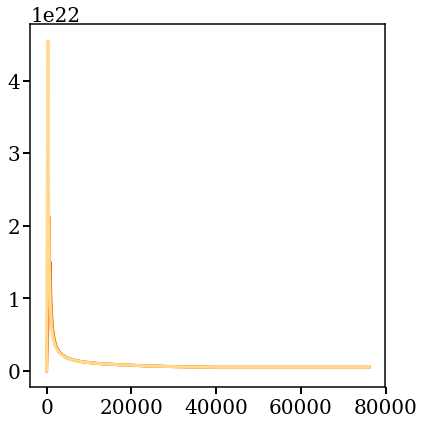

In [30]:
#~~~~~~MODEL LIGHT CURVES~~~~~~~~#
param = [1.4, 1.0, 0.5]
units = [r' $\rm{cm^{-3}}$', r' $\times\ 10^{51}$ ergs', r' $\rm{M_{\odot}}$']
tim, rad, lum, vel = snr_ind.lightcurve_Full(n0=0.1, mej=param[0], e51=0.5, freq=freq, epse=0.0001, pp=2.2, sntype='ia')
timlow, radlow, lumlow, vel = snr_ind.lightcurve_Full(n0=0.1, mej=param[1], e51=0.5, freq=freq, epse=0.0001, pp=2.2, sntype='ia')
timhi, radhi, lumhi, vel = snr_ind.lightcurve_Full(n0=0.1, mej=param[2], e51=0.5, freq=freq, epse=0.0001, pp=2.2, sntype='ia')
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

colors = ['#ffffd4','#fed98e','#fe9929','#d95f0e','#993404']
plt.rc('font', family='serif')
plt.figure(figsize=(6,6))
if 1:
    plt.plot(tim[np.nonzero(lum)], lum[np.nonzero(lum)], ls='-', lw=3.0, color=colors[3],\
             label=str(param[0])+units[2])
    plt.plot(timlow[np.nonzero(lumlow)], lumlow[np.nonzero(lumlow)], ls='-', lw=3.0, color=colors[2], \
             label=str(param[1])+units[2])
    plt.plot(timhi[np.nonzero(lumhi)], lumhi[np.nonzero(lumhi)], ls='-', lw=3.0, color=colors[1], \
             label=str(param[2])+units[2])
plt.errorbar([131],[lumsn1885], yerr=yerr*4., color='k', uplims=True, capsize=5)
#plt.text(155,6.0e21, 'SN 1885a', fontsize=12, color='r')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('6.2 GHz Luminosity [ergs/s/Hz]', fontsize=20)
plt.xlabel('Age [years]', fontsize=20)
plt.xlim(10.,5000)
plt.ylim(1.0e19,7.0e23)
plt.legend(loc=4, fontsize=12)

plt.figure(figsize=(6,6))
if 1:
    plt.plot(tim[np.nonzero(rad)], rad[np.nonzero(rad)], ls='-', lw=3.0, color=colors[3], \
             label = str(param[0]) + units[2])
    plt.plot(timlow[np.nonzero(radlow)], radlow[np.nonzero(radlow)], ls='-', lw=3.0, color=colors[2], \
             label = str(param[1]) + units[2])
    plt.plot(timhi[np.nonzero(radhi)], radhi[np.nonzero(radhi)], ls='-', lw=3.0, color=colors[1], \
             label = str(param[2]) + units[2])
plt.errorbar([131], [1.5], yerr=0.15, color='k', lolims=True, capsize=5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Age [years]', fontsize=20)
plt.ylabel('Radius [pc]', fontsize=20)
plt.xlim(10.,5000.)
plt.ylim(0.4,10)
plt.legend(loc=4, fontsize=12)

#plt.savefig(fileext_SantaCruz+'LightCurves_SN1885a.pdf', dpi=150)

## SN G1.9+0.3

#### Definition of general observational parameters (e.g. flux, age, radius, frequency)

In [1]:
#Scaling flux by frequency, assuming alpha = 0.6

nu1 = 6.2 
nu2 = 1.4
alpha = 0.63
fnu2 = 0.935 #Jy
print 'Flux = ', fnu2*((nu1/nu2)**(-alpha)) 

Flux =  0.366155455259


In [3]:
import snrlightcurve_mejkin_ind as snr
reload(snr)

def flux_to_lum(flux, fluxerr, dist, e_dist):
    lum = 1.0e24*1.2*flux*dist*dist
    lumerr = 1.0e24*np.sqrt((2.4*flux*dist*e_dist)**2.0 + (1.2*dist*dist*fluxerr)**2.0)
    return (lum, lumerr)

#PROPERTIES OF G1.9
lum1, e_lum1 = flux_to_lum(0.74*1.0e3, 0.038*1.0e3, 8.5e-3, 0.0)
#Condon (1998) 1.425 GHz assumed to be taken in 1993, taken from Green (2008)
lum2, e_lum2 = flux_to_lum(0.935*1.0e3, 0.047*1.0e3, 8.5e-3, 0.0)
#1.4 GHz Green (2008) measurement

#Whether the ages are uncertain or not, the difference between the two measurements
#is 16 years regardless. 
age1 = 124
age2 = 140 #yrs, based on Reynolds 2008, based on the expansion rate measured between 1985 and 2008. Now this 
            #is an upper limit, since the SNR must have decelerated during this time.
ageerr = 0.
print '1.425 GHz lumosity of G1.9 [ergs/s/Hz] = ', lum2, e_lum2

1.425 GHz lumosity of G1.9 [ergs/s/Hz] =  8.10645e+22 4.0749e+21


### Testing ejecta energy-mass parameter space for G1.9

**Strategy**: I'll use just the light curve measurements for now. Since it's monotonically increasing, I'll assume the 1994 measurement to be a lower limit, and then 2008 as the upper limit. Preliminary comparisons showed the light curve, with the n=10 slope, fell between these two points for the best $M_{ej}-E_{51}$ values. Whether the slope is correct or not is another story, we'll get to that later. **okay this is not a good strategy. You can satisfy this even with a decreasing LC**.

Radius comparison might be tricky. There's no published measurement of size in 1994 that I'm aware of. I could use the expansion rate 
to estimate radius in 1994, but invites another string of uncertainties to be accounted for. Maybe later I might somehow combine the radius measurement.

In [6]:
reload(g19)
density = 0.3
freq=1.425e9
epse=1.0e-4
pp=2.2
#mejBest_0, e51Best_0 = g19.Ekin_Mej_ParameterSpace_G19(density=density, epse=1.0e-3, pp=2.2)
#mejBest_rad_0, e51Best_rad_0 = g19.Ekin_Mej_RadiusConstraint_G19_twoages(density=density, epse=1.0e-4, pp=2.2)
mejarray_lum, y_e51_lum_high = g19.Ekin_Mej_LumConstraint_G19(lum_obs=lum1-e_lum1, density=density, age=126, epse=epse, pp=pp, \
                                                          freq=freq)
mejarray_lum, y_e51_lum_low = g19.Ekin_Mej_LumConstraint_G19(lum_obs=lum2+e_lum2, density=density, age=140., epse=epse, pp=pp, \
                                                         freq=freq)
mejarray, y_e51_high = g19.Ekin_Mej_RadiusConstraint_G19(rad=1.72, density=density, age=118.)
mejarray, y_e51_low = g19.Ekin_Mej_RadiusConstraint_G19(rad=2.0, density=density, age=140.)
#mejBest_1, e51Best_1 = g19.Ekin_Mej_ParameterSpace_G19(density=4.0, epse=1.0e-4, pp=2.2)
#mejBest_2, e51Best_2 = g19.Ekin_Mej_ParameterSpace_G19(density=5.0, epse=1.0e-4, pp=2.2)

This is radius constrain from two ages. **CHECK**

Putting radius constraints. The equation for radius for Type Ia SN in free expansion is :-

$R_s = \left(\rm{1.29\ pc}\right) \left(\dfrac{t}{100 \rm{yr}}\right)^{0.7} \left(\dfrac{E}{10^{51}\ \rm{ergs}}\right)^{0.35} \left(\dfrac{n_0}{1\ \rm{cm^{-3}}}\right)^{-0.1} \left(\dfrac{M_{ej}}{1\ \rm{M_\odot}}\right)^{-0.25}$

Assume $t = 140$ yr. This is an upper limit.

For now, just assume that ubiquitous 2 pc measurement is the blastwave radius. We can read in more details later what the actual radio/synchrotron radius is. According to [Borkowski 2014](http://iopscience.iop.org/article/10.1088/2041-8205/790/2/L18/pdf), the measured (size?) is :-

$r = (2.04\ \rm{pc})\left(\dfrac{d}{8.5\ \rm{kpc}}\right)$

Need to check what the angular extent of G1.9 is.


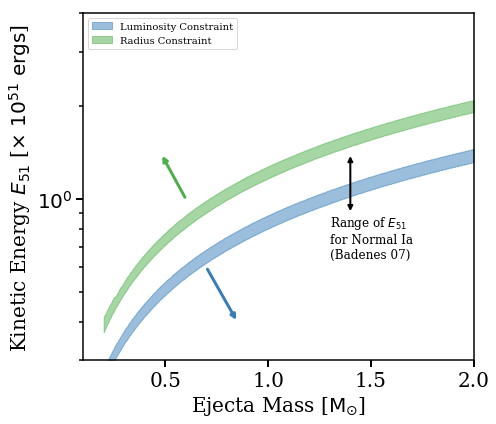

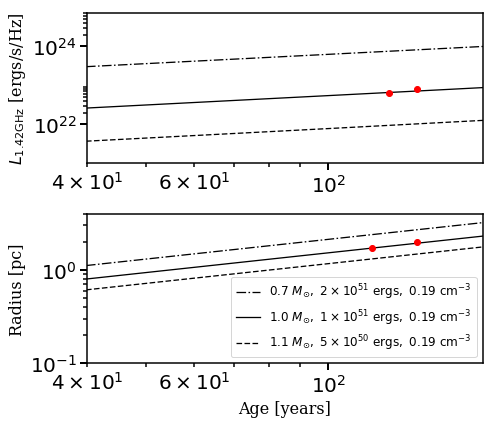

In [7]:
import snrlightcurve_freqparam as snr_ind
#~~~~~~INPUT FOR CHECKING PARAMETER SPACE~~~~~~~~#
n0=0.05
mej = 1.4
e51 = 0.9
epse=1.0e-4
pp=2.2
showInputOnContourPlot = False
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#


plt.figure(figsize=(7,6))
plt.rc('font', family='serif')
plt.annotate(s='', xy=(1.4,1.4), xytext=(1.4,0.9), arrowprops={'arrowstyle':'<|-|>', \
                                                       'lw':2, 'color':'k'})
plt.text(1.3, 0.65, 'Range of $E_{51}$\nfor Normal Ia\n(Badenes 07)', color='k', fontsize=12)
#RADIUS ARROW
plt.annotate(s='', xy=(0.48,1.4), xytext=(0.6,1.0), arrowprops={'arrowstyle':'-|>', \
                                                       'lw':3, 'color':'#4daf4a'})
#LUMINOSITY ARROW
plt.annotate(s='', xy=(0.85,0.4), xytext=(0.7,0.6), arrowprops={'arrowstyle':'-|>', \
                                                       'lw':3, 'color':'#377eb8'})
plt.fill_between(x=mejarray_lum, y1=y_e51_lum_high, y2=y_e51_lum_low, color='#377eb8',alpha=0.5, label='Luminosity Constraint')
plt.fill_between(x=mejarray, y1=y_e51_low, y2=y_e51_high, color='#4daf4a', alpha=0.5, label='Radius Constraint')

if showInputOnContourPlot:
    plt.axvline(x=mej, ls='-', color='r', lw=1.0)
    plt.axhline(y=e51, ls='-', color='r', lw=1.0)
    plt.plot([mej], [e51], 'ro')
plt.yscale('log')
plt.ylim(0.3,4.0)
plt.xlim(0.1, 2.0)
plt.xlabel(r'Ejecta Mass [$\rm{M_{\odot}}$]', fontsize=20)
plt.ylabel(r'Kinetic Energy $E_{51}$ [$\rm{\times\ 10^{51}\ ergs}$]', fontsize=20)
#plt.legend(numpoints=1, bbox_to_anchor=(1.52,1.025), fontsize=15, borderpad = 0.6, handletextpad=0.6, labelspacing=0.5)
plt.legend(loc=2)
#plt.savefig(fileext_CommitteeMeet+'G19constraint.pdf', dpi=100)
plt.show()

#~~~~~~MODEL LIGHT CURVES~~~~~~~~#
if 0:
    tim, rad, lum, vel = snr_ind.lightcurve_Full(n0=n0, mej=mej, e51=e51, freq=freq, epse=epse, pp=pp, sntype='ia')
if 1:
    tim, rad, lum, vel = snr_ind.lightcurve_Full(n0=0.19, mej=1.0, e51=1.0, freq=freq, epse=1.0e-4, pp=2.2, sntype='ia')
    timlow, radlow, lumlow, vel = snr_ind.lightcurve_Full(n0=0.19, mej=1.1, e51=0.5, freq=freq, epse=1.0e-4, pp=2.2, sntype='ia')
    timhi, radhi, lumhi, vel = snr_ind.lightcurve_Full(n0=0.19, mej=0.7, e51=2.0, freq=freq, epse=1.0e-4, pp=2.2, sntype='ia')
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

plt.rc('font', family='serif')
fig, (ax0, ax1) = plt.subplots(figsize=(7,6), nrows=2)
ax0.plot(tim[np.nonzero(lum)], lum[np.nonzero(lum)], 'k-', label=r'$1.4\ M_{\odot},\ 7\times10^{50}\ \rm{ergs},\ 0.1\ cm^{-3}$')
ax0.plot(timlow[np.nonzero(lumlow)], lumlow[np.nonzero(lumlow)], 'k--', \
         label=r'$1.3\ M_{\odot},\ 3\times10^{50}\ \rm{ergs},\ 0.1\ cm^{-3}$')
ax0.plot(timhi[np.nonzero(lumhi)], lumhi[np.nonzero(lumhi)], 'k-.', \
         label=r'$1.0\ M_{\odot},\ 9\times10^{50}\ \rm{ergs},\ 0.1\ cm^{-3}$')  #Note the ages 
ax0.errorbar([126],[lum1], yerr=e_lum1, xerr=ageerr, fmt='o', color='r')
ax0.errorbar([140.],[lum2], yerr=e_lum2, xerr=ageerr, fmt='o', color='r')
#plt.text(155,6.0e21, 'SN 1885a', fontsize=12, color='r')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_ylabel('$L_{1.42 \mathrm{GHz}}$ [ergs/s/Hz]', fontsize=16)
ax0.set_xlim(40, 180)
ax0.set_ylim(1.0e21,7.0e24)

ax1.plot(timhi[np.nonzero(radhi)], radhi[np.nonzero(radhi)], 'k-.', \
         label=r'$0.7\ M_{\odot},\ 2\times10^{51}\ \rm{ergs},\ 0.19\ cm^{-3}$')
ax1.plot(tim[np.nonzero(rad)], rad[np.nonzero(rad)], 'k-', \
         label=r'$1.0\ M_{\odot},\ 1\times10^{51}\ \rm{ergs},\ 0.19\ cm^{-3}$')
ax1.plot(timlow[np.nonzero(radlow)], radlow[np.nonzero(radlow)], 'k--', \
         label=r'$1.1\ M_{\odot},\ 5\times10^{50}\ \rm{ergs},\ 0.19\ cm^{-3}$')

ax1.plot([118.], [1.72], 'ro')    #Note the ages
ax1.plot([140.], [2.0], 'ro')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Age [years]', fontsize=16)
ax1.set_ylabel('Radius [pc]', fontsize=16)
ax1.set_xlim(40,180)
ax1.set_ylim(1.0e-1,4.)
ax1.legend(loc=4, fontsize=12)

plt.subplots_adjust(hspace=0.3)
#plt.savefig(fileext_CommitteeMeet+'LightCurves_G19.pdf', dpi=100)

### Check Luminosity Parameter Space

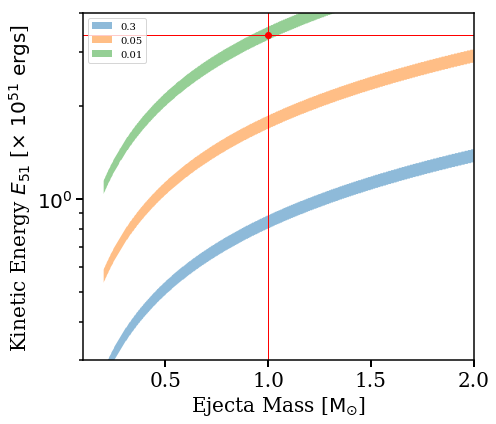

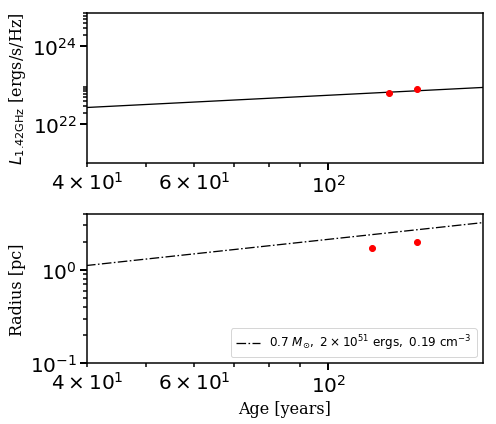

In [21]:
import snrlightcurve_freqparam as snr_ind
#~~~~~~INPUT FOR CHECKING PARAMETER SPACE~~~~~~~~#
n0=0.01
mej = 1.0
e51 = 3.4
epse=1.0e-4
pp=2.2
showInputOnContourPlot = True
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
reload(g19)
density = [0.3, 0.05, 0.01]
freq=1.425e9
#mejBest_0, e51Best_0 = g19.Ekin_Mej_ParameterSpace_G19(density=density, epse=1.0e-3, pp=2.2)
#mejBest_rad_0, e51Best_rad_0 = g19.Ekin_Mej_RadiusConstraint_G19_twoages(density=density, epse=1.0e-4, pp=2.2)
mejarray_lum, y_e51_lum_high = g19.Ekin_Mej_LumConstraint_G19(lum_obs=lum1-e_lum1, density=density[0], age=126, epse=epse, pp=pp, \
                                                          freq=freq)
mejarray_lum, y_e51_lum_low = g19.Ekin_Mej_LumConstraint_G19(lum_obs=lum2+e_lum2, density=density[0], age=140., epse=epse, pp=pp, \
                                                         freq=freq)
mejarray_lum_2, y_e51_lum_high_2 = g19.Ekin_Mej_LumConstraint_G19(lum_obs=lum1-e_lum1, density=density[1], age=126, epse=epse, pp=pp, \
                                                          freq=freq)
mejarray_lum_2, y_e51_lum_low_2 = g19.Ekin_Mej_LumConstraint_G19(lum_obs=lum2+e_lum2, density=density[1], age=140., epse=epse, pp=pp, \
                                                         freq=freq)
mejarray_lum_3, y_e51_lum_high_3 = g19.Ekin_Mej_LumConstraint_G19(lum_obs=lum1-e_lum1, density=density[2], age=126, epse=epse, pp=pp, \
                                                          freq=freq)
mejarray_lum_3, y_e51_lum_low_3 = g19.Ekin_Mej_LumConstraint_G19(lum_obs=lum2+e_lum2, density=density[2], age=140., epse=epse, pp=pp, \
                                                         freq=freq)

#mejBest_1, e51Best_1 = g19.Ekin_Mej_ParameterSpace_G19(density=4.0, epse=1.0e-4, pp=2.2)
#mejBest_2, e51Best_2 = g19.Ekin_Mej_ParameterSpace_G19(density=5.0, epse=1.0e-4, pp=2.2)
plt.figure(figsize=(7,6))
plt.rc('font', family='serif')

plt.fill_between(x=mejarray_lum, y1=y_e51_lum_high, y2=y_e51_lum_low, alpha=0.5, label=str(density[0]))
plt.fill_between(x=mejarray_lum_2, y1=y_e51_lum_high_2, y2=y_e51_lum_low_2, alpha=0.5, label=str(density[1]))
plt.fill_between(x=mejarray_lum_3, y1=y_e51_lum_high_3, y2=y_e51_lum_low_3, alpha=0.5, label=str(density[2]))

if showInputOnContourPlot:
    plt.axvline(x=mej, ls='-', color='r', lw=1.0)
    plt.axhline(y=e51, ls='-', color='r', lw=1.0)
    plt.plot([mej], [e51], 'ro')
plt.yscale('log')
plt.ylim(0.3,4.0)
plt.xlim(0.1, 2.0)
plt.xlabel(r'Ejecta Mass [$\rm{M_{\odot}}$]', fontsize=20)
plt.ylabel(r'Kinetic Energy $E_{51}$ [$\rm{\times\ 10^{51}\ ergs}$]', fontsize=20)
#plt.legend(numpoints=1, bbox_to_anchor=(1.52,1.025), fontsize=15, borderpad = 0.6, handletextpad=0.6, labelspacing=0.5)
plt.legend(loc=2)
#plt.savefig(fileext_CommitteeMeet+'G19constraint.pdf', dpi=100)
plt.show()

#~~~~~~MODEL LIGHT CURVES~~~~~~~~#
if 1:
    tim, rad, lum, vel = snr_ind.lightcurve_Full(n0=n0, mej=mej, e51=e51, freq=freq, epse=epse, pp=pp, sntype='ia')
if 0:
    tim, rad, lum, vel = snr_ind.lightcurve_Full(n0=0.19, mej=1.0, e51=1.0, freq=freq, epse=1.0e-4, pp=2.2, sntype='ia')
    timlow, radlow, lumlow, vel = snr_ind.lightcurve_Full(n0=0.19, mej=1.1, e51=0.5, freq=freq, epse=1.0e-4, pp=2.2, sntype='ia')
    timhi, radhi, lumhi, vel = snr_ind.lightcurve_Full(n0=0.19, mej=0.7, e51=2.0, freq=freq, epse=1.0e-4, pp=2.2, sntype='ia')
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

plt.rc('font', family='serif')
fig, (ax0, ax1) = plt.subplots(figsize=(7,6), nrows=2)
ax0.plot(tim[np.nonzero(lum)], lum[np.nonzero(lum)], 'k-', label=r'$1.4\ M_{\odot},\ 7\times10^{50}\ \rm{ergs},\ 0.1\ cm^{-3}$')
if 0:
    ax0.plot(timlow[np.nonzero(lumlow)], lumlow[np.nonzero(lumlow)], 'k--', \
             label=r'$1.3\ M_{\odot},\ 3\times10^{50}\ \rm{ergs},\ 0.1\ cm^{-3}$')
    ax0.plot(timhi[np.nonzero(lumhi)], lumhi[np.nonzero(lumhi)], 'k-.', \
             label=r'$1.0\ M_{\odot},\ 9\times10^{50}\ \rm{ergs},\ 0.1\ cm^{-3}$')  #Note the ages 
ax0.errorbar([126],[lum1], yerr=e_lum1, xerr=ageerr, fmt='o', color='r')
ax0.errorbar([140.],[lum2], yerr=e_lum2, xerr=ageerr, fmt='o', color='r')
#plt.text(155,6.0e21, 'SN 1885a', fontsize=12, color='r')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_ylabel('$L_{1.42 \mathrm{GHz}}$ [ergs/s/Hz]', fontsize=16)
ax0.set_xlim(40, 180)
ax0.set_ylim(1.0e21,7.0e24)

ax1.plot(timhi[np.nonzero(radhi)], radhi[np.nonzero(radhi)], 'k-.', \
         label=r'$0.7\ M_{\odot},\ 2\times10^{51}\ \rm{ergs},\ 0.19\ cm^{-3}$')
if 0:
    ax1.plot(tim[np.nonzero(rad)], rad[np.nonzero(rad)], 'k-', \
             label=r'$1.0\ M_{\odot},\ 1\times10^{51}\ \rm{ergs},\ 0.19\ cm^{-3}$')
    ax1.plot(timlow[np.nonzero(radlow)], radlow[np.nonzero(radlow)], 'k--', \
             label=r'$1.1\ M_{\odot},\ 5\times10^{50}\ \rm{ergs},\ 0.19\ cm^{-3}$')

ax1.plot([118.], [1.72], 'ro')    #Note the ages
ax1.plot([140.], [2.0], 'ro')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Age [years]', fontsize=16)
ax1.set_ylabel('Radius [pc]', fontsize=16)
ax1.set_xlim(40,180)
ax1.set_ylim(1.0e-1,4.)
ax1.legend(loc=4, fontsize=12)

plt.subplots_adjust(hspace=0.3)
#plt.savefig(fileext_CommitteeMeet+'LightCurves_G19.pdf', dpi=100)

### Check Radius Parameter Space

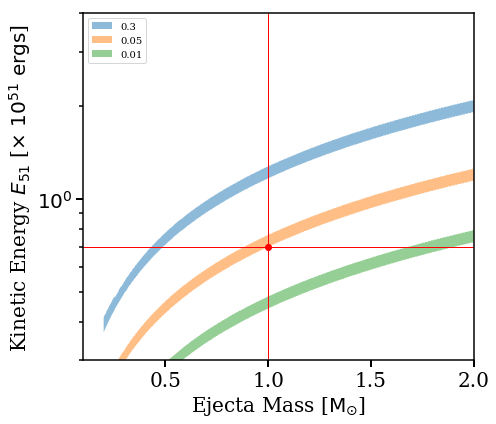

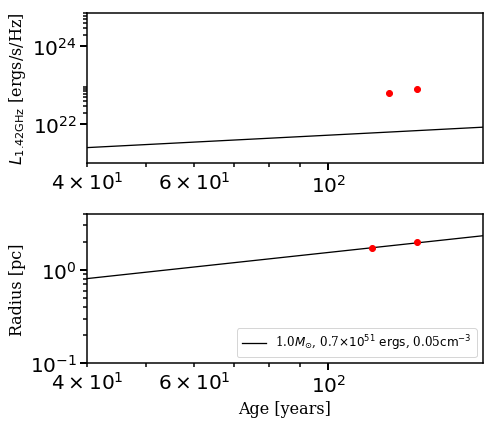

In [28]:
import snrlightcurve_freqparam as snr_ind
#~~~~~~INPUT FOR CHECKING PARAMETER SPACE~~~~~~~~#
n0=0.05
mej = 1.0
e51 = 0.7
epse=1.0e-4
pp=2.2
showInputOnContourPlot = True
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
reload(g19)
density = [0.3, 0.05, 0.01]
freq=1.425e9

mejarray_0, y_e51_high_0 = g19.Ekin_Mej_RadiusConstraint_G19(rad=1.72, density=density[0], age=118.)
mejarray_0, y_e51_low_0 = g19.Ekin_Mej_RadiusConstraint_G19(rad=2.0, density=density[0], age=140.)
mejarray_1, y_e51_high_1 = g19.Ekin_Mej_RadiusConstraint_G19(rad=1.72, density=density[1], age=118.)
mejarray_1, y_e51_low_1 = g19.Ekin_Mej_RadiusConstraint_G19(rad=2.0, density=density[1], age=140.)
mejarray_2, y_e51_high_2 = g19.Ekin_Mej_RadiusConstraint_G19(rad=1.72, density=density[2], age=118.)
mejarray_2, y_e51_low_2 = g19.Ekin_Mej_RadiusConstraint_G19(rad=2.0, density=density[2], age=140.)

#mejBest_1, e51Best_1 = g19.Ekin_Mej_ParameterSpace_G19(density=4.0, epse=1.0e-4, pp=2.2)
#mejBest_2, e51Best_2 = g19.Ekin_Mej_ParameterSpace_G19(density=5.0, epse=1.0e-4, pp=2.2)
plt.figure(figsize=(7,6))
plt.rc('font', family='serif')

plt.fill_between(x=mejarray, y1=y_e51_high, y2=y_e51_low, alpha=0.5, label=str(density[0]))
plt.fill_between(x=mejarray_1, y1=y_e51_high_1, y2=y_e51_low_1, alpha=0.5, label=str(density[1]))
plt.fill_between(x=mejarray_2, y1=y_e51_high_2, y2=y_e51_low_2, alpha=0.5, label=str(density[2]))

if showInputOnContourPlot:
    plt.axvline(x=mej, ls='-', color='r', lw=1.0)
    plt.axhline(y=e51, ls='-', color='r', lw=1.0)
    plt.plot([mej], [e51], 'ro')
plt.yscale('log')
plt.ylim(0.3,4.0)
plt.xlim(0.1, 2.0)
plt.xlabel(r'Ejecta Mass [$\rm{M_{\odot}}$]', fontsize=20)
plt.ylabel(r'Kinetic Energy $E_{51}$ [$\rm{\times\ 10^{51}\ ergs}$]', fontsize=20)
#plt.legend(numpoints=1, bbox_to_anchor=(1.52,1.025), fontsize=15, borderpad = 0.6, handletextpad=0.6, labelspacing=0.5)
plt.legend(loc=2)
#plt.savefig(fileext_CommitteeMeet+'G19constraint.pdf', dpi=100)
plt.show()

#~~~~~~MODEL LIGHT CURVES~~~~~~~~#
if 1:
    tim, rad, lum, vel = snr_ind.lightcurve_Full(n0=n0, mej=mej, e51=e51, freq=freq, epse=epse, pp=pp, sntype='ia')
if 0:
    tim, rad, lum, vel = snr_ind.lightcurve_Full(n0=0.19, mej=1.0, e51=1.0, freq=freq, epse=1.0e-4, pp=2.2, sntype='ia')
    timlow, radlow, lumlow, vel = snr_ind.lightcurve_Full(n0=0.19, mej=1.1, e51=0.5, freq=freq, epse=1.0e-4, pp=2.2, sntype='ia')
    timhi, radhi, lumhi, vel = snr_ind.lightcurve_Full(n0=0.19, mej=0.7, e51=2.0, freq=freq, epse=1.0e-4, pp=2.2, sntype='ia')
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

plt.rc('font', family='serif')
fig, (ax0, ax1) = plt.subplots(figsize=(7,6), nrows=2)
ax0.plot(tim[np.nonzero(lum)], lum[np.nonzero(lum)], 'k-', label=r'$1.4\ M_{\odot},\ 7\times10^{50}\ \rm{ergs},\ 0.1\ cm^{-3}$')
if 0:
    ax0.plot(timlow[np.nonzero(lumlow)], lumlow[np.nonzero(lumlow)], 'k--', \
             label=r'$1.3\ M_{\odot},\ 3\times10^{50}\ \rm{ergs},\ 0.1\ cm^{-3}$')
    ax0.plot(timhi[np.nonzero(lumhi)], lumhi[np.nonzero(lumhi)], 'k-.', \
             label=r'$1.0\ M_{\odot},\ 9\times10^{50}\ \rm{ergs},\ 0.1\ cm^{-3}$')  #Note the ages 
ax0.errorbar([126],[lum1], yerr=e_lum1, xerr=ageerr, fmt='o', color='r')
ax0.errorbar([140.],[lum2], yerr=e_lum2, xerr=ageerr, fmt='o', color='r')
#plt.text(155,6.0e21, 'SN 1885a', fontsize=12, color='r')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_ylabel('$L_{1.42 \mathrm{GHz}}$ [ergs/s/Hz]', fontsize=16)
ax0.set_xlim(40, 180)
ax0.set_ylim(1.0e21,7.0e24)


ax1.plot(tim[np.nonzero(rad)], rad[np.nonzero(rad)], 'k-', \
         label=str(mej)+r'$M_{\odot}$, '+str(e51)+r'$\times 10^{51}\ \rm{ergs}$, '+str(n0)+r'$\rm{cm^{-3}}$')
if 0:
    ax1.plot(tim[np.nonzero(rad)], rad[np.nonzero(rad)], 'k-', \
             label=r'$1.0\ M_{\odot},\ 1\times10^{51}\ \rm{ergs},\ 0.19\ cm^{-3}$')
    ax1.plot(timlow[np.nonzero(radlow)], radlow[np.nonzero(radlow)], 'k--', \
             label=r'$1.1\ M_{\odot},\ 5\times10^{50}\ \rm{ergs},\ 0.19\ cm^{-3}$')

ax1.plot([118.], [1.72], 'ro')    #Note the ages
ax1.plot([140.], [2.0], 'ro')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Age [years]', fontsize=16)
ax1.set_ylabel('Radius [pc]', fontsize=16)
ax1.set_xlim(40,180)
ax1.set_ylim(1.0e-1,4.)
ax1.legend(loc=4, fontsize=12)

plt.subplots_adjust(hspace=0.3)
#plt.savefig(fileext_CommitteeMeet+'LightCurves_G19.pdf', dpi=100)

Radius constraints

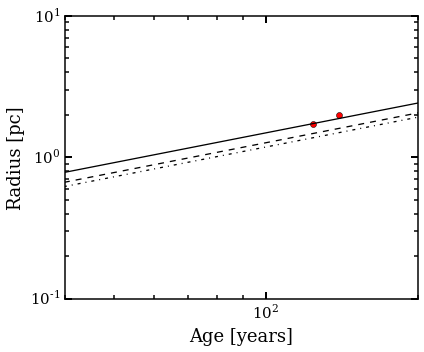

In [31]:
t, r_t, lum_t, v_t = snr_ind.lightcurve_Full(n0=0.1, e51=1.0, mej=1.4, pp=2.2, epse=1.0e-4, sntype='ia')
t2, r_t2, lum_t2, v_t = snr_ind.lightcurve_Full(n0=0.5, e51=1.0, mej=1.4, pp=2.2, epse=1.0e-4, sntype='ia')
t3, r_t3, lum_t3, v_t = snr_ind.lightcurve_Full(n0=1.0, e51=1.0, mej=1.4, pp=2.2, epse=1.0e-4, sntype='ia')


plt.rc('font', family='serif')
plt.figure(figsize=(6,5))
#plt.plot(tim[np.nonzero(lum)], lum[np.nonzero(lum)], 'k-')
plt.plot([age1], [1.72], 'ro')
#plt.errorbar([age1],[lum1], yerr=e_lum1, xerr=ageerr, color='r')
plt.plot([age2], [2.0], 'ro')
plt.plot(t[np.nonzero(r_t)], r_t[np.nonzero(r_t)], 'k-')
plt.plot(t2[np.nonzero(r_t2)], r_t2[np.nonzero(r_t2)], 'k--')
plt.plot(t3[np.nonzero(r_t3)], r_t3[np.nonzero(r_t3)], 'k-.')

#plt.plot(t_e51[np.nonzero(lum_t_e51)], lum_t_e51[np.nonzero(lum_t_e51)], 'r-')
#plt.plot(t2_e51[np.nonzero(lum_t2_e51)], lum_t2_e51[np.nonzero(lum_t2_e51)], 'r--')
#plt.plot(t3_e51[np.nonzero(lum_t3_e51)], lum_t3_e51[np.nonzero(lum_t3_e51)], 'r-.')

#plt.text(155,6.0e21, 'SN 1885a', fontsize=12, color='r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Age [years]', fontsize=18)
plt.ylabel('Radius [pc]', fontsize=18)
plt.xlim(40,200)
plt.ylim(0.1,10.)
plt.legend(loc=2, frameon=False, fontsize=13)
plt.tight_layout()
#plt.savefig('density_mej_example.pdf')
plt.show()

In [58]:
#Scaling flux by frequency, assuming alpha = 0.6

nu1 = 4.86 
nu2 = 1.4
alpha = 0.63
fnu2 = 0.935 #Jy
print 'Flux = ', fnu2*((nu1/nu2)**(-alpha)) 

Flux =  0.426865861622


## Variation of light curves with 'n'

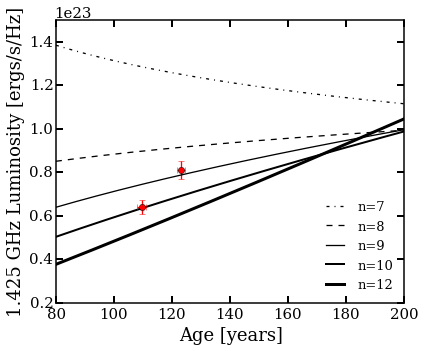

In [32]:
import snrlightcurve_testexpindex as snr_testexp
reload(snr_testexp)
tim_7, rad, lum_7, vel = snr_testexp.lightcurve_Full(n0=0.12, e51=1.0, mej=1.4, epse=1.0e-3, pp=2.4, slope=7.)
tim_8, rad, lum_8, vel = snr_testexp.lightcurve_Full(n0=0.12, e51=1.0, mej=1.4, epse=1.0e-3, pp=2.4, slope=8.)
tim_9, rad, lum_9, vel = snr_testexp.lightcurve_Full(n0=0.12, e51=1.0, mej=1.4, epse=1.0e-3, pp=2.4, slope=9.)
tim_10, rad, lum_10, vel = snr_testexp.lightcurve_Full(n0=0.12, e51=1.0, mej=1.4, epse=1.0e-3, pp=2.4, slope=10.)
tim_12, rad, lum_12, vel = snr_testexp.lightcurve_Full(n0=0.12, e51=1.0, mej=1.4, epse=1.0e-3, pp=2.4, slope=12.)
plt.figure(figsize=(6,5))
plt.plot(tim_7[np.nonzero(lum_7)], lum_7[np.nonzero(lum_7)], 'k-.', label='n=7')
plt.plot(tim_8[np.nonzero(lum_8)], lum_8[np.nonzero(lum_8)], 'k--',label='n=8')
plt.plot(tim_9[np.nonzero(lum_9)], lum_9[np.nonzero(lum_9)], 'k-',label='n=9')
plt.plot(tim_10[np.nonzero(lum_10)], lum_10[np.nonzero(lum_10)], 'k-', lw=2.0, label='n=10')
plt.plot(tim_12[np.nonzero(lum_12)], lum_12[np.nonzero(lum_12)],'k-',  lw=3.0, label='n=12')
plt.plot([age1], [lum1], 'ro')
plt.errorbar([age1],[lum1], yerr=e_lum1, xerr=ageerr, color='r')
plt.plot([age2], [lum2], 'ro')
plt.errorbar([age2],[lum2], yerr=e_lum2, xerr=ageerr, color='r')

#plt.text(155,6.0e21, 'SN 1885a', fontsize=12, color='r')
#plt.xscale('log')
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel('Age [years]', fontsize=18)
plt.ylabel('1.425 GHz Luminosity [ergs/s/Hz]', fontsize=18)
plt.xlim(80, 200)
plt.ylim(2.0e22,1.5e23)
plt.legend(loc=4, frameon=False, fontsize=13)
plt.show()

In [58]:
snr_testexp.isDetect(fluxLim=0.0027, beamSize=3.81, diamSNR=2.0, lumSNR=8.1e22)

False

## Committee Meeting Presentation

NameError: name 'tim' is not defined

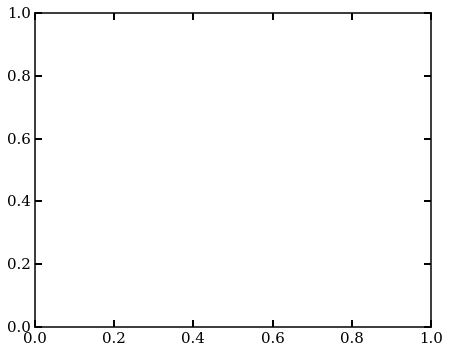

In [5]:
plt.rc('font', family='serif')
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(tim[np.nonzero(lum)], lum[np.nonzero(lum)], 'k-')
plt.errorbar([131],[lumsn1885], yerr=yerr, color='r', uplims=True, capsize=5)
#plt.text(155,6.0e21, 'SN 1885a', fontsize=12, color='r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Age [years]', fontsize=18)
plt.ylabel('8.4 GHz Luminosity [ergs/s/Hz]', fontsize=18)
plt.xlim(7.0,2.0e3)
plt.ylim(1.0e19,1.0e24)
plt.legend(loc=2, frameon=False, fontsize=13)

plt.subplot(1,2,2)
plt.plot(tim[np.nonzero(rad)], rad[np.nonzero(rad)], 'k-')
plt.plot([131],[1.5], 'ro')
plt.errorbar([131], [1.5], yerr=0.15, fmt='o', color='r')
plt.text(131,0.7, 'SN 1885a\n(Ca II absorption)', fontsize=12, color='r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Age [years]', fontsize=18)
plt.ylabel('Radius [pc]', fontsize=18)
plt.xlim(7.0,2000)
plt.ylim(1.0e-1,5.0e1)
plt.legend(loc=2, frameon=False, fontsize=13)
plt.tight_layout()
plt.show()

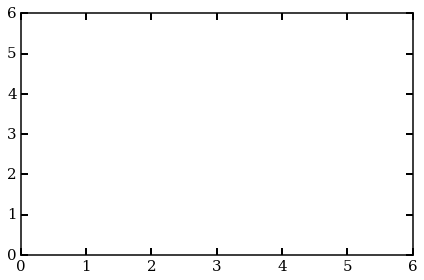

In [19]:
a = np.linspace(2,4,500)
b = np.linspace(2,4,500)
A,B = np.meshgrid(a,b)
plt.plot(A,B,'r.')
plt.xlim(0,6)
plt.ylim(0,6)
plt.show()

In [46]:
a = np.random.randint(1,10, size=(3,3))
b = np.random.randint(1,10, size=(3,3))
c = np.diag([1,1,1])+1
print c
whind = np.where(c==1.)
print whind[0], whind[1]
print a[whind]

[[2 1 1]
 [1 2 1]
 [1 1 2]]
[0 0 1 1 2 2] [1 2 0 2 0 1]
[1 3 1 2 7 4]


array([[7, 2, 4],
       [9, 5, 4],
       [5, 5, 5]])

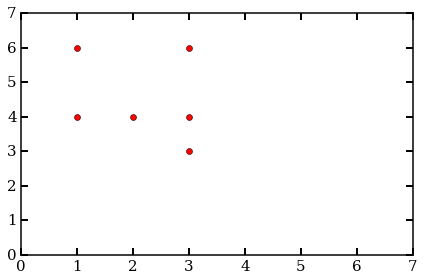

In [32]:
a = np.array([1,1,2,3,3,3])
b = np.array([4,6,4,4,3,6])
plt.plot(a,b, 'ro')
plt.xlim(0,7)
plt.ylim(0,7)
plt.show()

In [182]:
def radius_ED(t, E, n0, mej):
    return 1.29*((t/100.)**0.7)*(E**0.35)*(n0**(-0.1))*(mej**(-0.25))

density = 1.0
age = 140.0
e51array = np.logspace(-1,1,1000)
mejarray = np.linspace(0.2, 2.0, 1000)
y_e51 = np.zeros(1000)
for i, mej in enumerate(mejarray):
    rad_mej = radius_ED(age, e51array, density, mej)
    bestval = e51array[np.argmin(np.absolute(rad_mej - 1.0))]
    if (rad_mej[np.argmin(np.absolute(rad_mej-1.0))] - 1.0)<0.01:
        y_e51[i]=bestval
    

## Presentation Purpose Plots

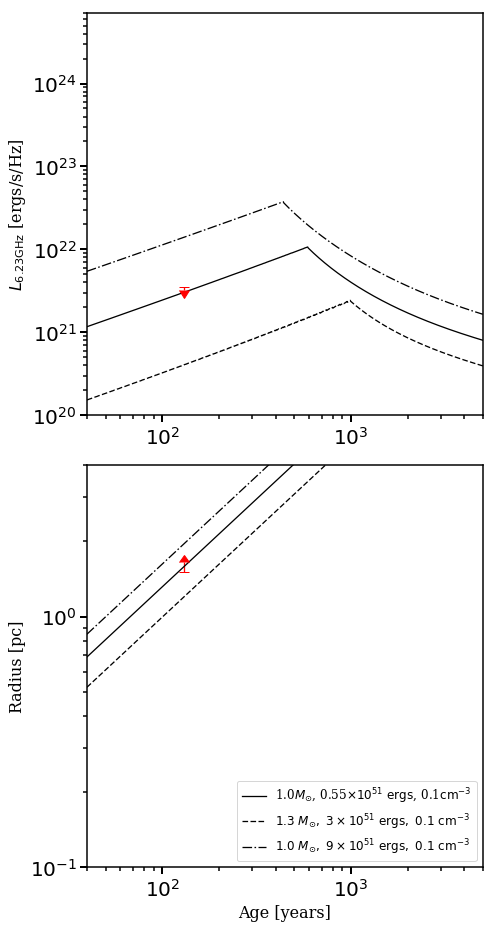

In [29]:
### Models

mejtest = 0.5
e51test = 0.5

#Wooseley (2010) models
subch_ek = np.array([1.4,1.5,1.5,1.5,1.4,1.7,1.9,9.7e-3,0.2,0.33,\
                     1.3,1.4,1.4,1.2,1.2,1.4,1.3,1.7,\
                     1.1,1.3,1.2,1.4,0.034,0.19,0.24,0.99,1.2,0.97,1.2,1.1,1.3,1.7])
subch_m = np.array([1.15,1.16,1.16,1.19, 1.13,1.23,1.3,0.017,0.12,0.2,\
                    1.06,1.08,1.09,1.05,1.07,1.12,1.08,1.18,\
                    0.96,1.02,1.01,1.05,0.049,0.12,0.15,0.91,0.94,0.9,0.96,0.94,0.97,1.08])

#Deflagration models
def_ek = np.array([0.51,0.64,0.74, 0.8,0.81,0.84])
def_m = np.ones(6)*1.37

#PDD + DDT
ddt_ek  = np.array([1.02,1.08,1.12,1.16,1.24,1.25,1.31,1.36,1.4,1.45])
ddt_m = np.ones(ddt_ek.size)*1.37

M, e = np.meshgrid(mejarray, e51array)
plt.rc('font', family='serif')

NameError: name 'e51array' is not defined

In [2]:
import snrlightcurve_freqparam as snr_ind
reload(snr_ind)


density = [0.01, 0.05, 0.1]
epse = 0.0001
pp = 2.2

fluxsn1885 = 0.00158*3.0 #mJy, Chomiuk's upper limit from document
dist = 0.785 #McConnachie 2005 - http://adsabs.harvard.edu/abs/2005MNRAS.356..979M
e_dist = 0.025
lumsn1885 = 1.0e24*1.2*fluxsn1885*dist*dist
yerr = 1.0e24*np.sqrt((2.4*fluxsn1885*dist*e_dist)**2.0)
rad1885 = 1.52 #Fesen07
raderr = 0.15
freq = 6.23e9 #Hz, observation from Laura

start = tm.time()
e51array = np.logspace(-1, 1, 800)
mejarray = np.linspace(0.1,2.0,800)
M, e = np.meshgrid(mejarray, e51array)
stat_1 = np.zeros((e51array.size, mejarray.size))
stat_2 = np.zeros((e51array.size, mejarray.size))
stat_3 = np.zeros((e51array.size, mejarray.size))

for i, e51 in enumerate(e51array):
    for j, mej in enumerate(mejarray):
        rad, lum, vel = snr_ind.lightcurve(n0=density[0], mej=mej, e51=e51, epse=epse, pp=pp, freq=freq, tsnap=131, sntype='ia')
        stat_1[i,j] = 1. if (lum<=lumsn1885) & (rad>=rad1885) & (vel>=11000.) else 0.
        rad, lum, vel = snr_ind.lightcurve(n0=density[1], mej=mej, e51=e51, epse=epse, pp=pp, freq=freq, tsnap=131, sntype='ia')
        stat_2[i,j] = 1. if (lum<=lumsn1885) & (rad>=rad1885) & (vel>=11000.) else 0.
        rad, lum, vel = snr_ind.lightcurve(n0=density[2], mej=mej, e51=e51, epse=epse, pp=pp, freq=freq, tsnap=131, sntype='ia')
        stat_3[i,j] = 1. if (lum<=lumsn1885) & (rad>=rad1885) & (vel>=11000.) else 0.


      

print 'RUNTIME = ',str(dt.timedelta(seconds=tm.time()-start))



RUNTIME =  0:00:50.183783


/Users/sumits2k/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


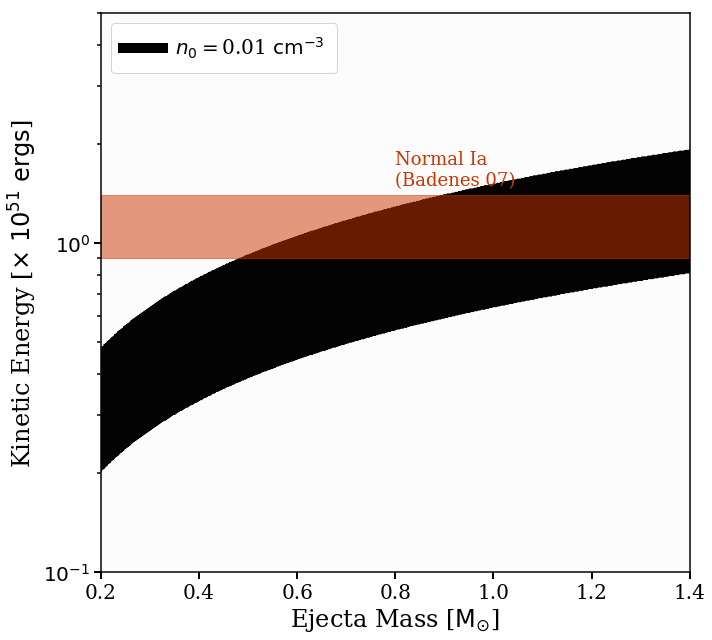

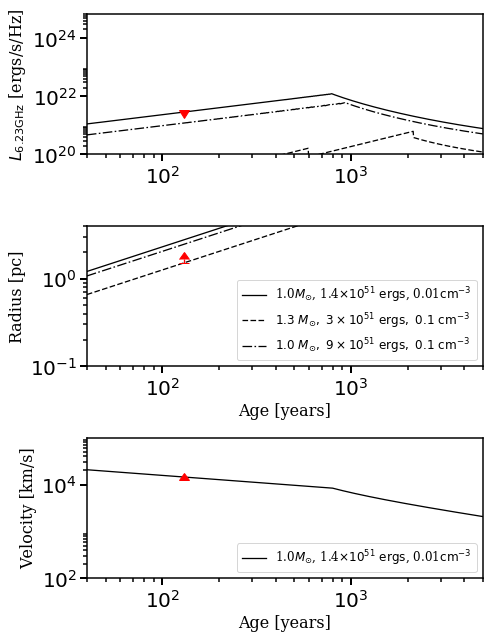

In [3]:
#~~~~~~INPUT~~~~~~~~#
mej = 1.0
e51 = 1.4
n0=0.01
showInputOnContourPlot = False
#~~~~~~~~~~~~~~~~~~~#

#~~~~~~MODEL LIGHT CURVES~~~~~~~~#
tim, rad, lum, vel = snr_ind.lightcurve_Full(n0=n0, mej=mej, e51=e51, freq=freq, epse=epse, pp=pp, sntype='ia')
timlow, radlow, lumlow, vellow = snr_ind.lightcurve_Full(n0=n0, mej=1.3, e51=0.3, freq=freq, epse=epse, pp=pp, sntype='ia')
timhi, radhi, lumhi, velhi = snr_ind.lightcurve_Full(n0=n0, mej=1.0, e51=1.0, freq=freq, epse=epse, pp=pp, sntype='ia')
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#


plt.figure(figsize=(10,9))
plt.rc('font', family='serif')
cs = plt.contourf(M,e,stat_1,40, cmap='gray_r',label='0.1')
#plt.contourf(M,e,stat_2,40,cmap='gray_r',alpha=0.5)
#lt.contourf(M,e,stat_3,40,cmap='gray_r',alpha=0.2)
#plt.annotate(s='', xy=(1.4,1.4), xytext=(1.4,0.9), arrowprops={'arrowstyle':'<|-|>', \
 #                                                      'lw':2, 'color':'red'})
if 1:
    plt.text(0.8, 1.5, 'Normal Ia\n(Badenes 07)', color='#CC3300', fontsize=18) 
    plt.axhspan(0.9, 1.4, color='#CC3300', alpha=0.5)
#plt.vlines(x=1.4, ymin=0.9, ymax=1.4, color='r', lw=3.0)

plt.plot([],[], 'k', lw=10.0, alpha=1.0, label=r'$n_0 = $'+'{} '.format(str(density[0]))+r'$\rm{cm^{-3}}$')
#plt.plot([],[], 'k', lw=10.0, alpha=0.5, label=r'$n_0 = $'+'{} '.format(str(density[1]))+r'$\rm{cm^{-3}}$')
#plt.plot([],[], 'k', lw=10.0, alpha=0.2, label=r'$n_0 = $'+'{} '.format(str(density[2]))+r'$\rm{cm^{-3}}$'+'\n(M31 Bulge)')
#plt.plot([1.4], [1.0], 'rx', mew=2.0, ms=10.0)
if showInputOnContourPlot:
    plt.axvline(x=mej, ls='-', color='r', lw=1.0)
    plt.axhline(y=e51, ls='-', color='r', lw=1.0)
    plt.plot([mej], [e51], 'ro')
plt.yscale('log')
plt.ylim(0.1,5.0)
plt.xlim(0.2, 1.4)
plt.xlabel(r'Ejecta Mass [$\rm{M_{\odot}}$]', fontsize=24)
plt.ylabel(r'Kinetic Energy [$\rm{\times\ 10^{51}\ ergs}$]', fontsize=24)
plt.legend(numpoints=1, loc=2, fontsize=20, borderpad = 0.6, handletextpad=0.6, labelspacing=0.5)
#plt.savefig(fileext_SantaCruz+'SN1885constraint.pdf', dpi=100)


plt.rc('font', family='serif')
fig, (ax0, ax1, ax2) = plt.subplots(figsize=(7,9), nrows=3)
ax0.plot(tim[np.nonzero(lum)], lum[np.nonzero(lum)], 'k-', label=r'$1.4\ M_{\odot},\ 7\times10^{50}\ \rm{ergs},\ 0.1\ cm^{-3}$')
ax0.plot(timlow[np.nonzero(lumlow)], lumlow[np.nonzero(lumlow)], 'k--', \
         label=r'$1.3\ M_{\odot},\ 3\times10^{50}\ \rm{ergs},\ 0.1\ cm^{-3}$')
ax0.plot(timhi[np.nonzero(lumhi)], lumhi[np.nonzero(lumhi)], 'k-.', \
         label=r'$1.0\ M_{\odot},\ 9\times10^{50}\ \rm{ergs},\ 0.1\ cm^{-3}$')
ax0.errorbar([131],[lumsn1885], yerr=yerr, color='r', uplims=True, capsize=5)
#plt.text(155,6.0e21, 'SN 1885a', fontsize=12, color='r')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_ylabel('$L_{6.23 \mathrm{GHz}}$ [ergs/s/Hz]', fontsize=16)
ax0.set_xlim(40.,5000)
ax0.set_ylim(1.0e20,7.0e24)

ax1.plot(tim[np.nonzero(rad)], rad[np.nonzero(rad)], 'k-', \
         label=str(mej)+r'$M_{\odot}$, '+str(e51)+r'$\times 10^{51}\ \rm{ergs}$, '+str(n0)+r'$\rm{cm^{-3}}$')
ax1.plot(timlow[np.nonzero(radlow)], radlow[np.nonzero(radlow)], 'k--', \
         label=r'$1.3\ M_{\odot},\ 3\times10^{51}\ \rm{ergs},\ 0.1\ cm^{-3}$')
ax1.plot(timhi[np.nonzero(radhi)], radhi[np.nonzero(radhi)], 'k-.', \
         label=r'$1.0\ M_{\odot},\ 9\times10^{51}\ \rm{ergs},\ 0.1\ cm^{-3}$')
ax1.errorbar([131], [1.5], yerr=0.15, color='r', lolims=True, capsize=5)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Age [years]', fontsize=16)
ax1.set_ylabel('Radius [pc]', fontsize=16)
ax1.set_xlim(40.,5000.)
ax1.set_ylim(1.0e-1,4.)
ax1.legend(loc=4, fontsize=12)

ax2.plot(tim, vel, 'k-', \
         label=str(mej)+r'$M_{\odot}$, '+str(e51)+r'$\times 10^{51}\ \rm{ergs}$, '+str(n0)+r'$\rm{cm^{-3}}$')

ax2.errorbar([131], [12500], yerr=0.15, color='r', lolims=True, capsize=5)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel('Age [years]', fontsize=16)
ax2.set_ylabel('Velocity [km/s]', fontsize=16)
ax2.set_xlim(40.,5000.)
ax2.set_ylim(1.0e2, 1.0e5)
ax2.legend(loc=4, fontsize=12)

plt.subplots_adjust(hspace=0.3)
#plt.savefig(fileext_SantaCruz+'LightCurves_SN1885a.pdf', dpi=150)

In [4]:
from astropy.table import Table
a = [1, 4, 5]
b = [2.0, 5.0, 8.2]
c = ['x', 'y', 'z']
t = Table([a, b, c], names=('a', 'b', 'c'), meta={'name': 'first table'})

In [5]:
t

a,b,c
int64,float64,str1
1,2.0,x
4,5.0,y
5,8.2,z


In [9]:
type(t)

astropy.table.table.Table